<a href="https://colab.research.google.com/github/ma-94/Data-Science-Portfolio/blob/main/Demo_of_IT_Artefact_Social_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Good Morning! 

#My name is Muhammad Ali and I am a system engineer working at an investment bank in London. I completed my bachelors in Aerospace engineering from University of Liverpool in 2016. My areas of interest include exploring use cases of deep neural networks and blockchain in stock and crypto price prediction.

# In this video demonstration, best performing social deep learning models for Ethereum price prediction will be discussed by providing a step by step analysis. For a holistic comparison, the metrics of baseline technical model will also be highlighted.

# In the spirit of Don't repeat yourself principle, note the following:
# The data preprocessing steps, model compiling and training steps followed by the data rescaling step for making predictions are all identical hence they will be explained once and refered in later parts.
# The time constraints of the demo doesn't allow for running the models in real time hence all the models will be ran just before the recording and results shown in the video.



# The first step involves clicking on connect/reconnect button on top right corner of the notebook. Coded is ran cell by cell by clicking the play button on top left corner of individual cells.

In [ ]:
# First, the required libraries and modules such as TensorFlow, pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn are imported.

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import MinMaxScaler

#The initial step in the data pre-processing pipeline is to load the data from a remote repository. In this case, we are loading data from the GitHub repository and storing it in a Pandas dataframe object. We use the pd.read_csv method to read the data in csv format from the specified URL and store it in the data variable.

In [ ]:
# Load the data from GitHub repo and store in a Pandas dataframe
url = 'https://raw.githubusercontent.com/ma-94/MSc-Artificial-Intelligence-Projects/main/Dissertation-datasets/ETH_social_dataset.csv'
data = pd.read_csv(url) 

# We visually inspect the dataframe by printing the data varaible. In this case, dataset has 9 headers excluding date column and consists of 945 rows.

In [ ]:
data

,Date,Sentiment Score,Close,Postive tweets,Negative tweets,Greed and fear score,Emotion Classification,Unique Address Count,Daily Transactions,Market Cap
0,01/04/2018,-1,379.606995,2171,2548,16,Extreme Fear,242924,545141,37892461913
1,02/04/2018,-1,386.424988,2603,3219,11,Extreme Fear,273669,598505,38071594417
2,03/04/2018,-1,416.893005,2724,3464,22,Extreme Fear,297313,645977,39862448116
3,04/04/2018,-1,380.542999,2622,3152,22,Extreme Fear,278604,628441,38662861077
4,05/04/2018,-1,383.231995,2356,3371,17,Extreme Fear,323318,695871,37337281864
...,...,...,...,...,...,...,...,...,...,...
940,27/12/2020,-1,682.642334,966,1527,91,Extreme Greed,429897,1177372,75386130383
941,28/12/2020,-1,730.397339,1217,1637,92,Extreme Greed,465651,1256783,82572772374
942,29/12/2020,-1,731.520142,966,1321,91,Extreme Greed,452769,1206703,82058302031
943,30/12/2020,-1,751.618958,994,1166,91,Extreme Greed,451586,1227653,83882375417


#The date column in the data is not used as a feature, but rather as a time stamp for the time series data. Hence, we set this column as the index of the Pandas dataframe using the set_index method.

In [ ]:
# Set date column as index
data.set_index('Date', inplace=True)

#It is important to check if there are any missing values in the dataset. In this case, we use the isna().sum() method to check for any missing values in the data dataframe.

In [ ]:
# Inspect the dataframe for any missing values 
data.isna().sum()

Sentiment Score           0
Close                     0
Postive tweets            0
Negative tweets           0
Greed and fear score      0
Emotion Classification    0
Unique Address Count      0
Daily Transactions        0
Market Cap                0
dtype: int64

#Machine learning models work best with numerical data, but in our data, the 'Emotion Classification' column is categorical. Therefore, we encode this categorical variable into numerical values using the preprocessing.LabelEncoder class from the Scikit-learn library. The fit_transform method is used to fit the encoder to the data and transform the categorical values to numerical values.

In [ ]:
#import label encoder
from sklearn import preprocessing 

#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
data['Emotion Classification'] = label_encoder.fit_transform(data['Emotion Classification'])
data

,Sentiment Score,Close,Postive tweets,Negative tweets,Greed and fear score,Emotion Classification,Unique Address Count,Daily Transactions,Market Cap
Date,,,,,,,,,
01/04/2018,-1,379.606995,2171,2548,16,0,242924,545141,37892461913
02/04/2018,-1,386.424988,2603,3219,11,0,273669,598505,38071594417
03/04/2018,-1,416.893005,2724,3464,22,0,297313,645977,39862448116
04/04/2018,-1,380.542999,2622,3152,22,0,278604,628441,38662861077
05/04/2018,-1,383.231995,2356,3371,17,0,323318,695871,37337281864
...,...,...,...,...,...,...,...,...,...
27/12/2020,-1,682.642334,966,1527,91,1,429897,1177372,75386130383
28/12/2020,-1,730.397339,1217,1637,92,1,465651,1256783,82572772374
29/12/2020,-1,731.520142,966,1321,91,1,452769,1206703,82058302031


#Correlation analysis is used to identify the features that have a strong correlation with the target variable ('Close' in this case). We use the data.corr() method to compute the correlation matrix and use the heatmap function from the Seaborn library to create a heatmap plot of the correlation matrix.

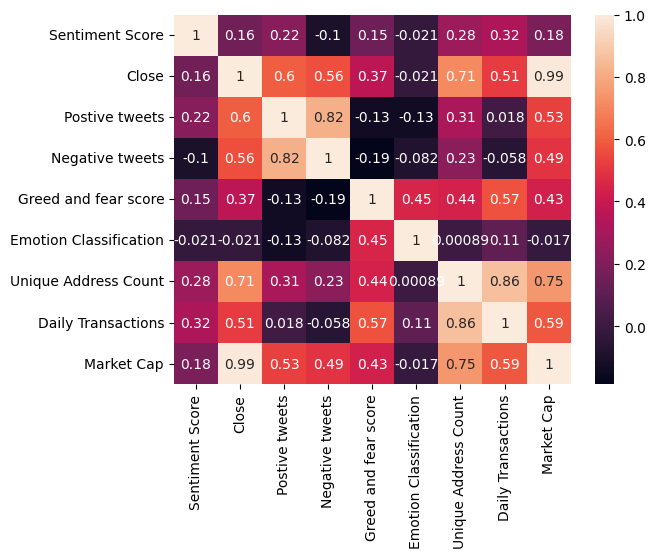

In [ ]:
# Use correlation plot to identify highly correlated features with respect to the target 'Close'
corr_matrix = data.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [1]:
#  Based on the correlation plot, we select the features that have a strong correlation with the target variable ('Close'). In this case, we select 
# 'Postive tweets', 'Sentiment Score', 'Negative tweets', 'Greed and fear score', and 'Close' as our features.

df3 = data[['Postive tweets','Sentiment Score','Negative tweets','Greed and fear score','Close']]


# The data is split into training and validation sets using a simple time-based split. The last 30 data points are used for validation, and the rest are used for training.

train_data = df3.iloc[:-30]  
validate_data = df3.iloc[-30:]

# Normalization is the process of scaling the data to a common range to prevent any variable from dominating over another. 
# In this case, we use the MinMaxScaler class from the Scikit-learn library to scale the data in the range of -1 to 1.


scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_scaled = scaler.fit_transform(train_data)
validate_data_scaled = scaler.transform(validate_data)

# The data preparation for time series data is slightly different from normal tabular data. 
# We need to create a sliding window of the data to feed to the model. 
# In this case, we use a sliding window of 7 days and use the previous 7 days' data to predict the next day's closing price. 
# The custom custom_ts_multi_data_prep function is custom data preparation function that is used for time series multi-step forecasting tasks. 
# It takes in a time series dataset, window size, number of future steps to forecast known as horizon,the number of features, and 
# returns two NumPy arrays - one containing the input sequences and the other containing the target sequences.

# The arguments of the custom function are follows:
# dataset: the input dataset, which should be a 2D array (matrix) where each row represents a time step and each column represents a feature
# target: the target variable to be predicted
# start: the index of the first time step to include in the output data (inclusive)
# finish: the index of the last time step to include in the output data (exclusive). If None, then the last time step will be used minus the horizon parameter.
# window: the size of the input window, or the number of time steps to use as input features for each prediction.
# horizon: the number of time steps ahead to predict.


window_size = 7 
horizon = 
def custom_ts_multi_data_prep(dataset, target, start, finish, window, horizon):
    X = []
    y = []
    start = start + window
    if finish is None:
        finish = len(dataset) - horizon         

    for value in range(start, finish):
        indices = range(value-window, value)
        X.append(dataset[indices])

        indicey = range(value+1, value+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

# Prepare the data for training and validation phases
# In the code snippet below, the function is used to prepare the training and validation data for a time series prediction problem. 
# The training data is the train_data_scaled dataset, which has all but the last column used as input features, and the last column as the target variable. 
# The validation data is the validate_data_scaled dataset, which is prepared in a similar manner. The window_size and horizon parameters are also specified. 

x_train, y_train = custom_ts_multi_data_prep(train_data_scaled[:, :-1], train_data_scaled[:, -1], 0, None, window_size, horizon)
x_val, y_val = custom_ts_multi_data_prep(validate_data_scaled[:, :-1], validate_data_scaled[:, -1], len(validate_data_scaled)-22-window_size, len(validate_data_scaled)-window_size, window_size, horizon)


SyntaxError: ignored

In [ ]:
# Visual inspection 
print (x_train)

[[[ 0.21694291 -1.         -0.09642944 -0.75555556]
  [ 0.53517495 -1.          0.22953607 -0.86666667]
  [ 0.62430939 -1.          0.34855477 -0.62222222]
  ...
  [ 0.35322284 -1.          0.30337624 -0.73333333]
  [ 0.3907919  -1.          0.15326694 -0.68888889]
  [ 0.16832413 -1.         -0.10420209 -0.66666667]]

 [[ 0.53517495 -1.          0.22953607 -0.86666667]
  [ 0.62430939 -1.          0.34855477 -0.62222222]
  [ 0.54917127 -1.          0.1969881  -0.62222222]
  ...
  [ 0.3907919  -1.          0.15326694 -0.68888889]
  [ 0.16832413 -1.         -0.10420209 -0.66666667]
  [ 0.01289134 -1.          0.01481661 -0.73333333]]

 [[ 0.62430939 -1.          0.34855477 -0.62222222]
  [ 0.54917127 -1.          0.1969881  -0.62222222]
  [ 0.35322284 -1.          0.30337624 -0.73333333]
  ...
  [ 0.16832413 -1.         -0.10420209 -0.66666667]
  [ 0.01289134 -1.          0.01481661 -0.73333333]
  [ 0.45782689 -1.          0.20038863 -0.64444444]]

 ...

 [[-0.70976059 -1.         -0.7823

In [ ]:
# Visual inspection
validate_data

,Postive tweets,Sentiment Score,Negative tweets,Greed and fear score,Close
Date,,,,,
02/12/2020,1126,1,1123,92,598.352356
03/12/2020,1037,-1,1063,92,616.708740
04/12/2020,971,-1,1019,92,569.354187
05/12/2020,734,-1,740,93,596.595459
06/12/2020,822,-1,897,95,601.908997
07/12/2020,992,-1,1067,94,591.843384
08/12/2020,1086,1,1044,95,554.827759
09/12/2020,935,-1,1045,86,573.479126
10/12/2020,850,-1,1062,94,559.678528


**Note: The data preprocessing steps are same for all models, only difference will be in model architecture and parameters.**

#**LSTM Model** 

In [ ]:
# LSTM is a type of recurrent neural network (RNN) that has additional memory cells to control the flow of information. 
# LSTM is designed to overcome the vanishing gradient problem in standard RNNs and can learn long-term dependencies


# This code defines the deep learning model's topology, which is a sequential model composed of two Bidirectional LSTM layers with 128 and 64 units, respectively, 
# followed by two Dropout layers with 0.2 dropout rate, and a Dense layer with horizon output units, representing the forecast for each time step in the horizon. 
# The input shape of the model is (window_size, train_data.shape[1]-1), which corresponds to the window size and the number of input features (excluding the target variable).


social_model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True), input_shape=(window_size, train_data.shape[1]-1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(horizon)
])

# This code compiles the deep learning model by specifying the optimizer (Adam with learning rate 0.001) and the loss function (mean squared error).

social_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [ ]:
# Now we move on to training the deep learning model by fitting it to the training data (x_train, y_train) for 100 epochs, with a batch size of 16. 
# The validation data represented by x_val and y_val is used to evaluate the performance of the model at each epoch. 
# The verbose=1 argument means that progress updates will be printed during training.

model_parameters = social_model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
57/57 [==============================] - 25s 63ms/step - loss: 0.0636 - val_loss: 0.6191
Epoch 2/100
57/57 [==============================] - 2s 27ms/step - loss: 0.0340 - val_loss: 0.5745
Epoch 3/100
57/57 [==============================] - 1s 25ms/step - loss: 0.0327 - val_loss: 0.4127
Epoch 4/100
57/57 [==============================] - 1s 26ms/step - loss: 0.0325 - val_loss: 0.4728
Epoch 5/100
57/57 [==============================] - 2s 27ms/step - loss: 0.0296 - val_loss: 0.3996
Epoch 6/100
57/57 [==============================] - 3s 51ms/step - loss: 0.0280 - val_loss: 0.3007
Epoch 7/100
57/57 [==============================] - 2s 29ms/step - loss: 0.0276 - val_loss: 0.3230
Epoch 8/100
57/57 [==============================] - 1s 26ms/step - loss: 0.0280 - val_loss: 0.5137
Epoch 9/100
57/57 [==============================] - 1s 26ms/step - loss: 0.0274 - val_loss: 0.2745
Epoch 10/100
57/57 [==============================] - 2s 28ms/step - loss: 0.0270 - val_loss: 0.207

In [ ]:
# Once the training finishes, we make predictions using the trained model on the validation data x_val.
y_prediction = social_model.predict(x_val)

1/1 [==============================] - 2s 2s/step


In [ ]:
# The second last step involves rescaling the predicted and actual values from the normalized scale back to their original scale, so that they can be compared. 
# The scaler.inverse_transform method is used to reverse the normalization process applied to the data earlier in the code. 
# The predicted and actual values are concatenated with the input features from the previous time steps and the target variable is extracted by selecting the last column of the resulting array. 
# The predicted values are assigned to y_prediction and the actual values are assigned to y_actual. 



y_prediction = scaler.inverse_transform(np.concatenate([train_data_scaled[-len(y_prediction):, :-1], y_prediction], axis=1))[:, -1]
y_actual = scaler.inverse_transform(np.concatenate([validate_data_scaled[-len(y_val):, :-1], y_val], axis=1))[:, -1]

In [ ]:
# The code below calculates several performance metrics such as MSE, RMSE, MAE and MAPE for the predicted values compared to the actual values, as well as plotting the 
# predicted and actual values using Plotly.




mse = metrics.mean_squared_error(y_actual, y_prediction)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_actual, y_prediction)

print(f'Actual Values: {y_actual}')
print(f'Predicted Values: {y_prediction}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

# Mean Absolute Percentage Error (MAPE)
mape = np.mean((np.abs(np.subtract(y_actual, y_prediction)/ y_actual))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(mape, 2)} %')

# Median Absolute Percentage Error (MDAPE)
mdape = np.median((np.abs(np.subtract(y_actual, y_prediction)/ y_actual)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(mdape, 2)} %')

# plot the predicted and true values
fig = px.line(x=validate_data.index[-15:], y=y_prediction, labels={'x':'Date', 'y':'ETH/USD Price'})
fig.add_scatter(x=validate_data.index[-15:], y=y_actual[-15:], name='Actual')
fig.add_scatter(x=validate_data.index[-15:], y=y_prediction[-15:], name='Predicted')
fig.show()

Actual Values: [545.797363 568.567322 589.663208 586.011169 589.355591 636.181824
 642.868958 654.811951 659.297913 638.290833 609.817871 634.854187
 583.7146   611.607178 626.410706]
Predicted Values: [577.71082368 596.0069929  614.56492201 636.87314694 656.28080331
 665.95030304 648.46438554 628.49531509 598.82912293 584.18023148
 598.19607493 561.52462183 575.09763046 594.98010554 613.50704308]
MSE: 1578.76
RMSE: 39.73
MAE: 33.43
Mean Absolute Percentage Error (MAPE): 5.46 %
Median Absolute Percentage Error (MDAPE): 4.68 %


#**CNN Model** 

In [ ]:
#  Moving on to the next architecture, we import the additional libraries required for constructing a CNN
from tensorflow.keras.layers import LSTM,Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
# CNNs are widely used in image processing tasks. Still, they can also be applied to time series data by treating the time series as an 
# image with one-dimensional spatial dimensions and one temporal dimension.



# The CNN model is defined using the Keras Sequential API, which allows us to stack layers in a sequential manner.
# Conv1D layer applies a one-dimensional convolution operation to the input. The layer has 64 filters and a kernel size of 3. 
# The activation function used is ReLU. The input shape is (window_size, x_train.shape[-1]), where window_size is the size of the sliding window and x_train.shape[-1] is the number 
# of features in the input data.

#  Dropout layer randomly sets a fraction of the input units to zero during each training epoch. The fraction of units to drop is 0.2.

#  Additional Conv1D layer applies another one-dimensional convolution operation to the input. The layer has 64 filters and a kernel size of 3. The activation function used is ReLU.

#  Dropout layer randomly sets a fraction of the input units to zero during each training epoch. The fraction of units to drop is 0.2.

# Flatten layer flattens the output of the previous layer into a 1D array. This is necessary because the next layer is a fully connected layer that requires a 1D input.

# Dense layer is a fully connected layer with 50 neurons and a ReLU activation function.

# And the last dense layer is a fully connected layer with a single neuron, which is the output of the model.




social_cnn_model = tf.keras.models.Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, x_train.shape[-1])),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
# We compile and train the model in same way as done with LSTM architecture.
social_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mse', 'mae'])

In [ ]:
# train the model
history = social_cnn_model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
57/57 [==============================] - 2s 8ms/step - loss: 0.0864 - mse: 0.0864 - mae: 0.2197 - val_loss: 0.5622 - val_mse: 0.5622 - val_mae: 0.7360
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0388 - mse: 0.0388 - mae: 0.1542 - val_loss: 0.3062 - val_mse: 0.3062 - val_mae: 0.5356
Epoch 3/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0344 - mse: 0.0344 - mae: 0.1455 - val_loss: 0.3513 - val_mse: 0.3513 - val_mae: 0.5716
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0319 - mse: 0.0319 - mae: 0.1405 - val_loss: 0.2862 - val_mse: 0.2862 - val_mae: 0.5085
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0313 - mse: 0.0313 - mae: 0.1387 - val_loss: 0.3204 - val_mse: 0.3204 - val_mae: 0.5444
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0288 - mse: 0.0288 - mae: 0.1328 - val_loss: 0.2994 - val_mse: 0.2994 - val_mae: 0.5259
Epoch 7/100
57/57 [===

In [ ]:
# make predictions on the validation set
y_prediction = social_cnn_model.predict(x_val)

1/1 [==============================] - 0s 133ms/step


In [ ]:
# rescale the data back to the original scale
y_prediction = scaler.inverse_transform(np.concatenate([train_data_scaled[-len(y_prediction):, :-1], y_prediction], axis=1))[:, -1]
y_actual = scaler.inverse_transform(np.concatenate([validate_data_scaled[-len(y_val):, :-1], y_val], axis=1))[:, -1]

In [ ]:
# evaluate the model
mse = metrics.mean_squared_error(y_actual, y_prediction)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_actual, y_prediction)

print(f'Actual Values: {y_actual}')
print(f'Predicted Values: {y_prediction}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

# Mean Absolute Percentage Error (MAPE)
mape = np.mean((np.abs(np.subtract(y_actual, y_prediction)/ y_actual))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(mape, 2)} %')

# Median Absolute Percentage Error (MDAPE)
mdape = np.median((np.abs(np.subtract(y_actual, y_prediction)/ y_actual)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(mdape, 2)} %')

# plot the predicted and true values
fig = px.line(x=validate_data.index[-15:], y=y_prediction, labels={'x':'Date', 'y':'ETH/USD Price'})
fig.add_scatter(x=validate_data.index[-15:], y=y_actual[-15:], name='Actual')
fig.add_scatter(x=validate_data.index[-15:], y=y_prediction[-15:], name='Predicted')
fig.show()

Actual Values: [545.797363 568.567322 589.663208 586.011169 589.355591 636.181824
 642.868958 654.811951 659.297913 638.290833 609.817871 634.854187
 583.7146   611.607178 626.410706]
Predicted Values: [523.99469034 513.94116562 517.22180072 557.54219458 564.11491488
 543.36027036 528.83903647 521.85941282 517.13409306 522.90881868
 529.73024576 540.3803636  528.31116568 503.33007622 497.02098053]
MSE: 8656.52
RMSE: 93.04
MAE: 84.50
Mean Absolute Percentage Error (MAPE): 13.54 %
Median Absolute Percentage Error (MDAPE): 14.59 %


#**LSTM-CNN Model** 

In [1]:
# The last architecure is CNN-LSTM model which uses a combination of CNNs and LSTM layers to predict future price of ethereum.
# The network topology comprises of a 1D convolutional layer with 64 filters and a kernel size of 3, which takes an input with shape (window_size, x_train.shape[-1]). 
# The activation function used is ReLU, which adds non-linearity to the output of the layer.
# A normalization layer that normalizes the activations of the previous convolutional layer across the batch.
# another 1D convolutional layer with 64 filters and a kernel size of 3, which also uses ReLU activation.
# another normalisation layer.
# an LSTM layer with 50 memory units, which returns sequences of output values. The purpose of this layer is to learn patterns in the temporal sequence of the input data.
# a regularization layer that randomly drops out 20% of the LSTM layer's output values during training. This helps to prevent overfitting of the model to the training data.
# a flatten layer that flattens the output of the LSTM layer into a 1D tensor, which can be passed to a fully connected layer.
# a fully connected layer with 50 neurons and a ReLU activation function.
# the final output layer, which has a single neuron that outputs the predicted value for the next time step.

model_3 = tf.keras.models.Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, x_train.shape[-1])),
    BatchNormalization(),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

# The model is compiled using the Adam optimizer with a learning rate of 0.001, and the mean squared error (MSE) is used as the loss function. 
# Additionally, the model is evaluated using the MSE and mean absolute error (MAE) metrics.

model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mse', 'mae'])

NameError: ignored

In [ ]:
# train the model
history = model_3.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
57/57 [==============================] - 5s 17ms/step - loss: 0.0721 - mse: 0.0721 - mae: 0.2022 - val_loss: 0.4516 - val_mse: 0.4516 - val_mae: 0.6650
Epoch 2/100
57/57 [==============================] - 0s 7ms/step - loss: 0.0410 - mse: 0.0410 - mae: 0.1572 - val_loss: 0.7240 - val_mse: 0.7240 - val_mae: 0.8445
Epoch 3/100
57/57 [==============================] - 0s 7ms/step - loss: 0.0354 - mse: 0.0354 - mae: 0.1457 - val_loss: 0.8392 - val_mse: 0.8392 - val_mae: 0.9092
Epoch 4/100
57/57 [==============================] - 0s 7ms/step - loss: 0.0307 - mse: 0.0307 - mae: 0.1350 - val_loss: 0.9247 - val_mse: 0.9247 - val_mae: 0.9512
Epoch 5/100
57/57 [==============================] - 0s 8ms/step - loss: 0.0313 - mse: 0.0313 - mae: 0.1360 - val_loss: 0.7093 - val_mse: 0.7093 - val_mae: 0.8279
Epoch 6/100
57/57 [==============================] - 0s 9ms/step - loss: 0.0278 - mse: 0.0278 - mae: 0.1271 - val_loss: 0.5052 - val_mse: 0.5052 - val_mae: 0.6893
Epoch 7/100
57/57 [==

In [ ]:
# make predictions on the validation set
y_prediction = model_3.predict(x_val)

1/1 [==============================] - 1s 792ms/step


In [ ]:
# rescale the data back to the original scale
y_prediction = scaler.inverse_transform(np.concatenate([train_data_scaled[-len(y_prediction):, :-1], y_prediction], axis=1))[:, -1]
y_actual = scaler.inverse_transform(np.concatenate([validate_data_scaled[-len(y_val):, :-1], y_val], axis=1))[:, -1]

In [ ]:
# evaluate the model
mse = metrics.mean_squared_error(y_actual, y_prediction)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_actual, y_prediction)

print(f'Actual Values: {y_actual}')
print(f'Predicted Values: {y_prediction}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

# Mean Absolute Percentage Error (MAPE)
mape = np.mean((np.abs(np.subtract(y_actual, y_prediction)/ y_actual))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(mape, 2)} %')

# Median Absolute Percentage Error (MDAPE)
mdape = np.median((np.abs(np.subtract(y_actual, y_prediction)/ y_actual)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(mdape, 2)} %')

# plot the predicted and true values
fig = px.line(x=validate_data.index[-15:], y=y_prediction, labels={'x':'Date', 'y':'ETH/USD Price'})
fig.add_scatter(x=validate_data.index[-15:], y=y_actual[-15:], name='Actual')
fig.add_scatter(x=validate_data.index[-15:], y=y_prediction[-15:], name='Predicted')
fig.show()

Actual Values: [545.797363 568.567322 589.663208 586.011169 589.355591 636.181824
 642.868958 654.811951 659.297913 638.290833 609.817871 634.854187
 583.7146   611.607178 626.410706]
Predicted Values: [462.13575725 445.34350234 443.34958159 471.13461453 509.35546603
 505.39752016 493.95716098 479.35908611 426.72568111 362.46686718
 453.71409883 557.27284493 581.70430844 485.60120425 425.08066629]
MSE: 23348.13
RMSE: 152.80
MAE: 138.31
Mean Absolute Percentage Error (MAPE): 22.33 %
Median Absolute Percentage Error (MDAPE): 21.67 %


# As seen in the graphs, both the social models  significantly outperform the technical baseline model by achieving a 68% decrease in avergae MSE and 48% decrease in average RMSE values.

# I would like to thank the assesors for their patience and time.